In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [80]:
# 4)What % of customers are repeat customers?

# Load the dataset from CSV files
sales_df = pd.read_csv('DataGrocery/sales.csv')  # Sales data containing CustomerID
customers_df = pd.read_csv("DataGrocery/customers.csv")  # Customer data linking Customer ID to City ID
cities_df = pd.read_csv("DataGrocery/cities.csv")  # City data linking City ID to Region



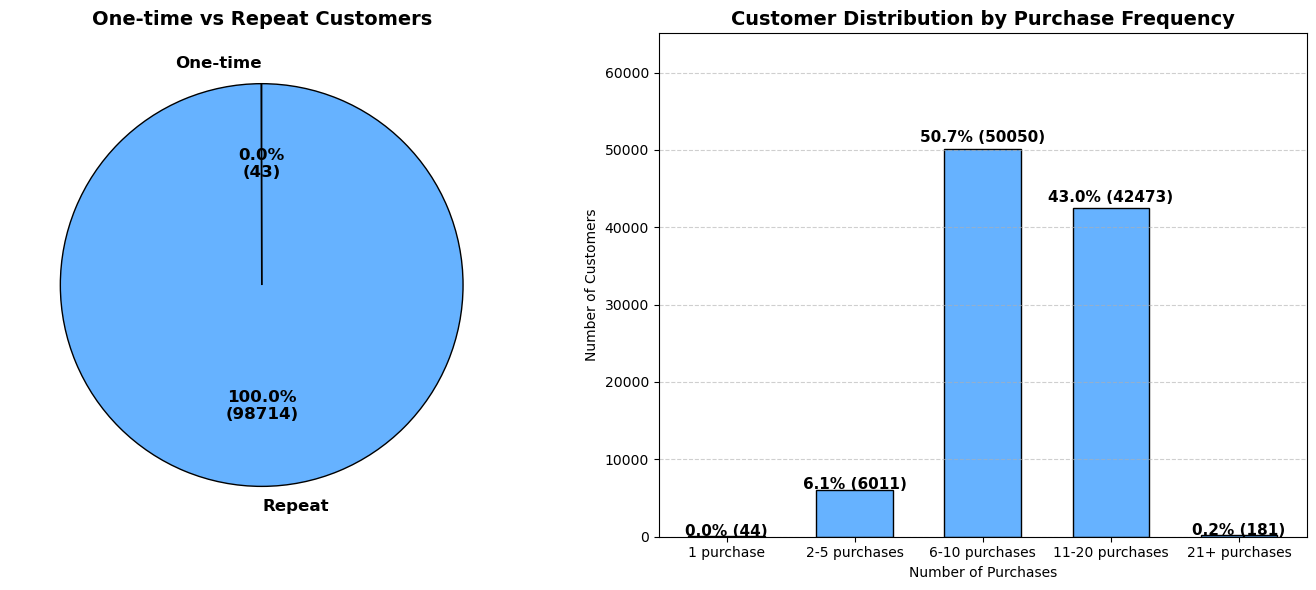

In [ ]:
# Count purchases per customer
purchase_counts = sales_df["CustomerID"].value_counts()

# Define purchase categories
bins = [0, 1, 5, 10, 20, float("inf")]
labels = ["1 purchase", "2-5 purchases", "6-10 purchases", "11-20 purchases", "21+ purchases"]
distribution = pd.cut(purchase_counts, bins=bins, labels=labels).value_counts().sort_index()
total_customers = distribution.sum()

# Calculate repeat customers
repeat_customers = purchase_counts[purchase_counts > 1].count()
one_time_customers = total_customers - repeat_customers

# Create figure with two subplots
fig, (pie_chart, bar_chart) = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart: One-time vs Repeat Customers
customer_types = ["One-time", "Repeat"]
customer_counts = [one_time_customers, repeat_customers]

# Pie Chart
pie_chart.pie(
    customer_counts, labels=customer_types, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100 * sum(customer_counts))})",
    colors=["#FF9999", "#66B2FF"], startangle=90, wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 12, "fontweight": "bold"}
)
pie_chart.set_title("One-time vs Repeat Customers", fontsize=14, fontweight="bold")

# Bar Chart
bars = bar_chart.bar(distribution.index, distribution.values, color="#66B2FF", edgecolor="black", width=0.6)

# Add labels
for bar, count in zip(bars, distribution.values):
    percentage = (count / total_customers) * 100
    bar_chart.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.02, 
                   f"{percentage:.1f}% ({count})", ha="center", fontsize=11, fontweight="bold")

# Formatting
bar_chart.set_xlabel("Number of Purchases")
bar_chart.set_ylabel("Number of Customers")
bar_chart.set_title("Customer Distribution by Purchase Frequency", fontsize=14, fontweight="bold")
bar_chart.set_ylim(0, max(distribution.values) * 1.3)
bar_chart.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
## 5)What region had the most repeat customers?

# Mapping of cities to regions
city_to_region = {
    # Northeast
    "Buffalo": "Northeast", "Boston": "Northeast", "Philadelphia": "Northeast",
    "New York": "Northeast", "Newark": "Northeast", "Pittsburgh": "Northeast",
    "Rochester": "Northeast", "Jersey": "Northeast", "Yonkers": "Northeast",

    # Midwest
    "Dayton": "Midwest", "Chicago": "Midwest", "Toledo": "Midwest", "Akron": "Midwest",
    "Indianapolis": "Midwest", "St. Louis": "Midwest", "Omaha": "Midwest", "Milwaukee": "Midwest",
    "Lincoln": "Midwest", "Des Moines": "Midwest", "Minneapolis": "Midwest", "Fort Wayne": "Midwest",
    "Detroit": "Midwest", "Cleveland": "Midwest", "Madison": "Midwest", "Columbus": "Midwest",
    "Kansas": "Midwest", "St. Paul": "Midwest", "Grand Rapids": "Midwest", "Cincinnati": "Midwest",
    "Wichita": "Midwest",

    # South
    "Virginia Beach": "South", "Austin": "South", "Arlington": "South", "Atlanta": "South",
    "Norfolk": "South", "Little Rock": "South", "Baton Rouge": "South", "Richmond": "South",
    "Memphis": "South", "Dallas": "South", "Montgomery": "South", "Nashville": "South",
    "Fort Worth": "South", "Miami": "South", "Mobile": "South", "Raleigh": "South",
    "Baltimore": "South", "Shreveport": "South", "Corpus Christi": "South", "Birmingham": "South",
    "Louisville": "South", "Oklahoma": "South", "New Orleans": "South", "Charlotte": "South",
    "Tampa": "South", "Jacksonville": "South", "Hialeah": "South", "Garland": "South",
    "Greensboro": "South", "Jackson": "South", "Houston": "South", "Tulsa": "South",
    "St. Petersburg": "South",

    # Southwest
    "El Paso": "Southwest", "Mesa": "Southwest", "Tucson": "Southwest",
    "Lubbock": "Southwest", "Albuquerque": "Southwest", "Phoenix": "Southwest",
    "San Antonio": "Southwest",

    # Northwest
    "Spokane": "Northwest", "Tacoma": "Northwest", "Portland": "Northwest",
    "Seattle": "Northwest",

    # West
    "Fremont": "West", "Riverside": "West", "Anaheim": "West", "Bakersfield": "West",
    "Denver": "West", "Glendale": "West", "Stockton": "West", "Fresno": "West",
    "San Francisco": "West", "Long Beach": "West", "Oakland": "West", "Santa Ana": "West",
    "San Diego": "West", "Sacramento": "West", "San Jose": "West", "Los Angeles": "West",
    "Colorado": "West", "Aurora": "West", "Las Vegas": "West", "Washington": "West",

    # Outside Contiguous US
    "Anchorage": "Outside Contiguous US", "Honolulu": "Outside Contiguous US",
}

In [ ]:
# Step 1: Assign regions to cities
cities_df["Region"] = cities_df["CityName"].map(city_to_region)



In [ ]:
# Step 2: Merge customers and sales data
repeat_customers = sales_df.groupby("CustomerID").size().reset_index(name="PurchaseCount")
repeat_customers = repeat_customers[repeat_customers["PurchaseCount"] > 1]  # Only repeat customers

# Merge with customers to get CityID
repeat_customers = repeat_customers.merge(customers_df, on="CustomerID", how="left")

# Merge with cities to get Region
repeat_customers = repeat_customers.merge(cities_df, on="CityID", how="left")



In [ ]:
# Step 3: Count repeat customers by region
region_repeat_customers = repeat_customers.groupby("Region")["CustomerID"].nunique().reset_index()
region_repeat_customers.columns = ["Region", "Repeat Customers"]
region_repeat_customers = region_repeat_customers.sort_values(by="Repeat Customers", ascending=False)

# Display results
print(region_repeat_customers)




In [ ]:
# Set general style
plt.style.use("seaborn-v0_8-muted")

# Generate colors using colormap
colors = plt.cm.Blues(np.linspace(0.5, 1, len(region_repeat_customers)))

# Create Bar Chart
plt.figure(figsize=(12, 6))
bars = plt.bar(region_repeat_customers["Region"], region_repeat_customers["Repeat Customers"], 
               color=colors, edgecolor="black", linewidth=1.2, alpha=0.85)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + bar.get_height() * 0.05,  # Raised by 5%
             f"{int(bar.get_height())}", ha="center", fontsize=10, color="black")

# Chart formatting
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Repeat Customers", fontsize=12)
plt.title("Number of Repeat Customers by Region", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show plot
plt.show()